<a href="https://colab.research.google.com/github/Ishan2506/Ml_program/blob/main/Final_Uni2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('/content/data.csv')
df

,Name,Age,Income
0,Sophia,26,42000
1,John,39,88000
2,John,36,95000
3,Daniel,48,73000
4,Olivia,54,96000
5,Emma,37,31000
6,Michael,45,78000
7,Emma,31,86000
8,Olivia,20,67000
9,Michael,42,96000


In [4]:
from sklearn.cluster import KMeans

In [5]:
kmean=KMeans(n_clusters=3)
kmean.fit(df[['Age','Income']])
kmean.predict([[31,54000]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc=MinMaxScaler()
df['Income']=sc.fit_transform(df[['Income']])
df['Age']=sc.fit_transform(df[['Age']])


In [9]:
df.head()

,Name,Age,Income
0,Sophia,0.153846,0.179104
1,John,0.487179,0.865672
2,John,0.410256,0.970149
3,Daniel,0.717949,0.641791
4,Olivia,0.871795,0.985075


In [11]:
y_pred=kmean.fit_predict(df[['Age','Income']])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 2, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1,
       0, 0, 2, 2, 2, 1], dtype=int32)

In [12]:
df['cluster']=y_pred
df.head()

,Name,Age,Income,cluster
0,Sophia,0.153846,0.179104,2
1,John,0.487179,0.865672,0
2,John,0.410256,0.970149,0
3,Daniel,0.717949,0.641791,0
4,Olivia,0.871795,0.985075,0


In [13]:
kmean.cluster_centers_

array([[0.69230769, 0.7981521 ],
       [0.76190476, 0.15884861],
       [0.15384615, 0.560199  ]])

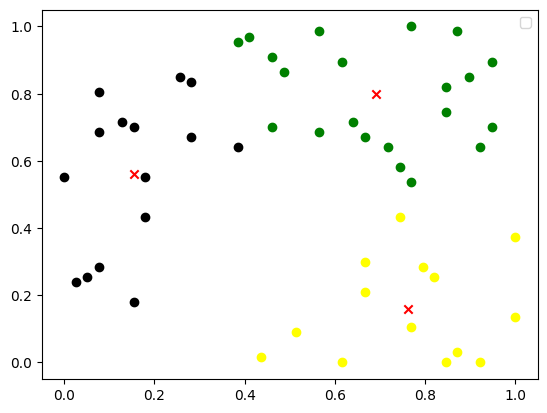

In [16]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color="green")
plt.scatter(df2.Age,df2['Income'],color="yellow")
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='red',marker="x")
plt.legend()
plt.show()

In [17]:
lst=[]
k_range=range(1,10)
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age','Income']])
  lst.append(km.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

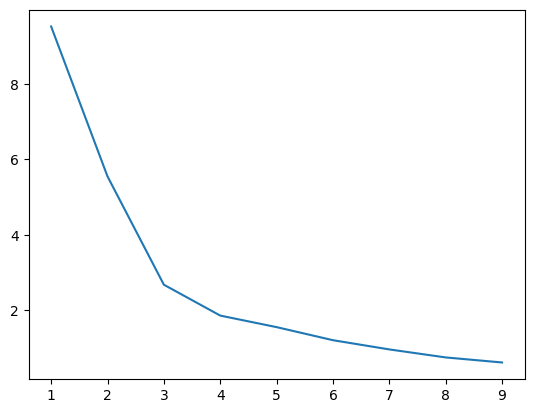

In [18]:
plt.plot(k_range,lst)
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     50 non-null     object 
 1   Age      50 non-null     float64
 2   Income   50 non-null     float64
 3   cluster  50 non-null     int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 1.5+ KB


In [21]:
df.describe()

,Age,Income,cluster
count,50.000000,50.000000,50.000000
mean,0.550256,0.547761,0.880000
std,0.307483,0.315756,0.848528
min,0.000000,0.000000,0.000000
25%,0.282051,0.261194,0.000000
50%,0.615385,0.641791,1.000000
75%,0.814103,0.817164,2.000000
max,1.000000,1.000000,2.000000


In [22]:
df['Age'].mean()

0.5502564102564103

In [23]:
df['Age'].mode()

0    0.076923
1    0.666667
2    0.769231
3    0.846154
Name: Age, dtype: float64

In [25]:
df['Income'].mode()

0    0.000000
1    0.641791
2    0.701493
Name: Income, dtype: float64

In [26]:
df['Income'].std()

0.3157558634656558

In [30]:
df[(df['Age']>0.5) & (df['Income']<0.6)].head()

,Name,Age,Income,cluster
10,Alice,0.512821,0.089552,1
14,Michael,0.615385,0.000000,1
15,Emily,0.846154,0.000000,1
17,Emma,0.743590,0.582090,0
18,Olivia,0.769231,0.104478,1


In [31]:
df.iloc[10:17]

,Name,Age,Income,cluster
10,Alice,0.512821,0.089552,1
11,John,0.846154,0.820896,0
12,John,0.846154,0.746269,0
13,David,0.384615,0.641791,2
14,Michael,0.615385,0.000000,1
15,Emily,0.846154,0.000000,1
16,John,0.923077,0.641791,0


In [33]:
df['Age'].value_counts()

Age
0.666667    3
0.076923    3
0.769231    3
0.846154    3
0.153846    2
0.384615    2
0.948718    2
0.179487    2
0.461538    2
1.000000    2
0.923077    2
0.615385    2
0.743590    2
0.871795    2
0.282051    2
0.564103    2
0.512821    1
0.128205    1
0.820513    1
0.410256    1
0.025641    1
0.717949    1
0.256410    1
0.794872    1
0.435897    1
0.641026    1
0.897436    1
0.000000    1
0.487179    1
0.051282    1
Name: count, dtype: int64

In [34]:
df[['Name','Age']].iloc[10:15]

,Name,Age
10,Alice,0.512821
11,John,0.846154
12,John,0.846154
13,David,0.384615
14,Michael,0.615385


In [36]:
df.groupby(df['cluster']).head()

,Name,Age,Income,cluster
0,Sophia,0.153846,0.179104,2
1,John,0.487179,0.865672,0
2,John,0.410256,0.970149,0
3,Daniel,0.717949,0.641791,0
4,Olivia,0.871795,0.985075,0
5,Emma,0.435897,0.014925,1
6,Michael,0.641026,0.716418,0
7,Emma,0.282051,0.835821,2
8,Olivia,0.000000,0.552239,2
10,Alice,0.512821,0.089552,1


In [37]:
df.loc[df['Age'].idxmax()]

Name          James
Age             1.0
Income     0.373134
cluster           1
Name: 20, dtype: object

In [38]:
df['Income'].sort_values()

49    0.000000
15    0.000000
14    0.000000
5     0.014925
39    0.029851
10    0.089552
18    0.104478
43    0.134328
0     0.179104
31    0.208955
35    0.238806
40    0.253731
48    0.253731
24    0.283582
26    0.283582
34    0.298507
20    0.373134
46    0.432836
37    0.432836
45    0.537313
8     0.552239
29    0.552239
17    0.582090
3     0.641791
16    0.641791
13    0.641791
41    0.671642
42    0.671642
27    0.686567
21    0.686567
38    0.701493
30    0.701493
33    0.701493
6     0.716418
47    0.716418
12    0.746269
32    0.805970
11    0.820896
7     0.835821
25    0.850746
19    0.850746
1     0.865672
28    0.895522
36    0.895522
22    0.910448
23    0.955224
2     0.970149
4     0.985075
9     0.985075
44    1.000000
Name: Income, dtype: float64

In [39]:
df.isnull()

,Name,Age,Income,cluster
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [45]:
df4=df.groupby(df['cluster'])['Income']
df4.min()
df5=df.groupby(df['cluster'])['Age']
df5.max()

cluster
0    0.948718
1    1.000000
2    0.384615
Name: Age, dtype: float64

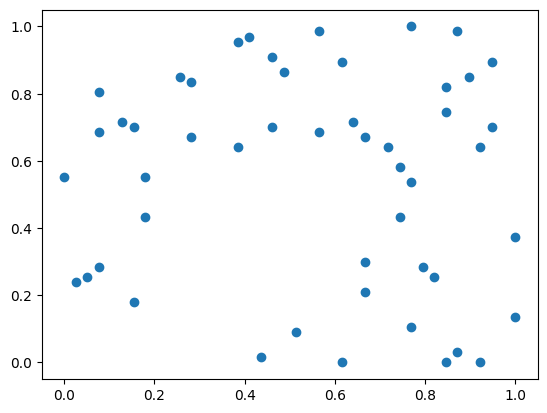

In [46]:
plt.scatter(df.Age,df['Income'])
plt.show()

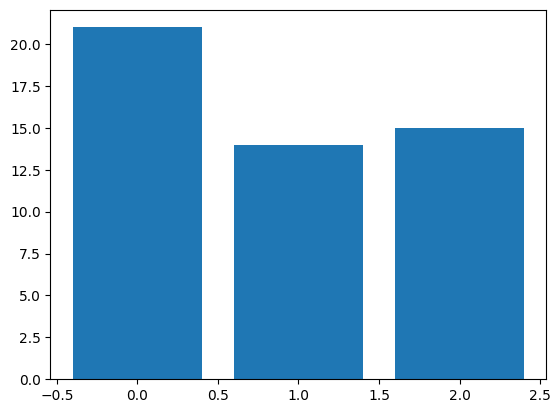

In [47]:
cnt=df['cluster'].value_counts()
plt.bar(cnt.index,cnt)
plt.show()

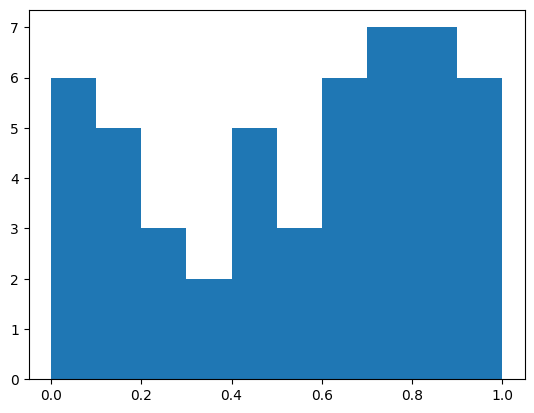

In [48]:
plt.hist(df.Age)
plt.show()

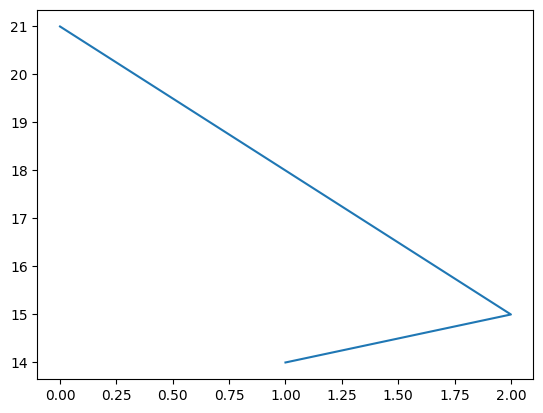

In [49]:
plt.plot(cnt)
plt.show()

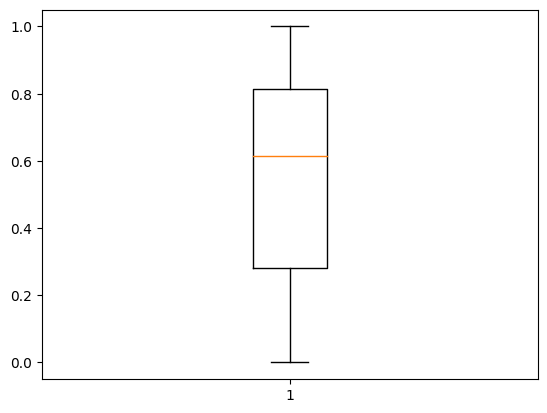

In [50]:
plt.boxplot(df.Age)
plt.show()

In [53]:
df.rename(columns={'Income':'Incomes'},inplace=True)
df

,Name,Age,Incomes,cluster
0,Sophia,0.153846,0.179104,2
1,John,0.487179,0.865672,0
2,John,0.410256,0.970149,0
3,Daniel,0.717949,0.641791,0
4,Olivia,0.871795,0.985075,0
5,Emma,0.435897,0.014925,1
6,Michael,0.641026,0.716418,0
7,Emma,0.282051,0.835821,2
8,Olivia,0.000000,0.552239,2
9,Michael,0.564103,0.985075,0
